In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
df=pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [104]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [133]:
 df.shape

(5033, 10)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5033 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5033 non-null   object 
 1   Year      5033 non-null   int64  
 2   Duration  5033 non-null   object 
 3   Genre     5033 non-null   object 
 4   Rating    5033 non-null   float64
 5   Votes     5033 non-null   int64  
 6   Director  5033 non-null   object 
 7   Actor 1   5033 non-null   object 
 8   Actor 2   5033 non-null   object 
 9   Actor 3   5033 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 561.6+ KB


In [135]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [136]:
df.describe()

,Year,Rating,Votes
count,5033.000000,5033.000000,5033.000000
mean,1998.041526,5.877906,83.187959
std,17.588852,1.380268,119.023788
min,1957.000000,1.100000,1.000000
25%,1985.000000,5.000000,9.000000
50%,2003.000000,6.100000,29.000000
75%,2014.000000,6.900000,101.000000
max,2021.000000,10.000000,536.000000


In [137]:
df = df.dropna()
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...
15492,Zorro,1975,150 min,"Action, Adventure, Comedy",5.6,33,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,1,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth


In [138]:
df.shape

(5033, 10)

In [111]:
df.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [112]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(0)

In [114]:
df['Year'] = df['Year'].astype(str).str.extract(r'(\d+)').astype(int)
df['Votes'] = df['Votes'].astype(str).str.extract(r'(\d+)').astype(int)

In [115]:
df.dtypes

Name         object
Year          int64
Duration     object
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [116]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Check for outliers and remove them

In [139]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['Year', 'Votes']

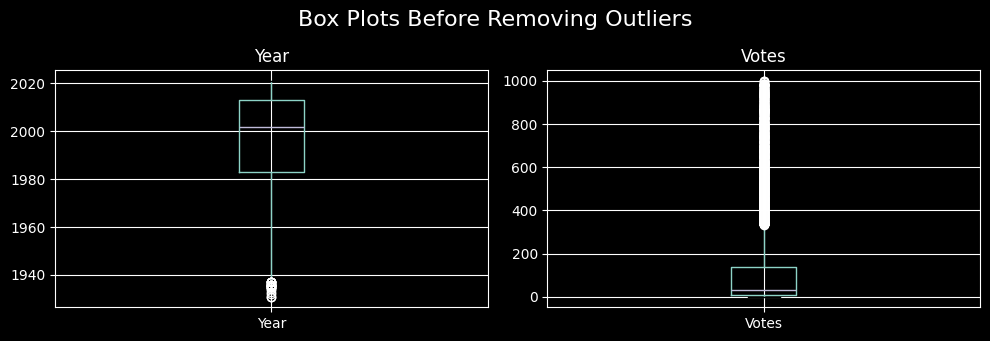

In [118]:
# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')
    plt.tight_layout()
plt.show()

In [119]:
# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

In [120]:
# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
df = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

Number of rows with outliers before removal: 626


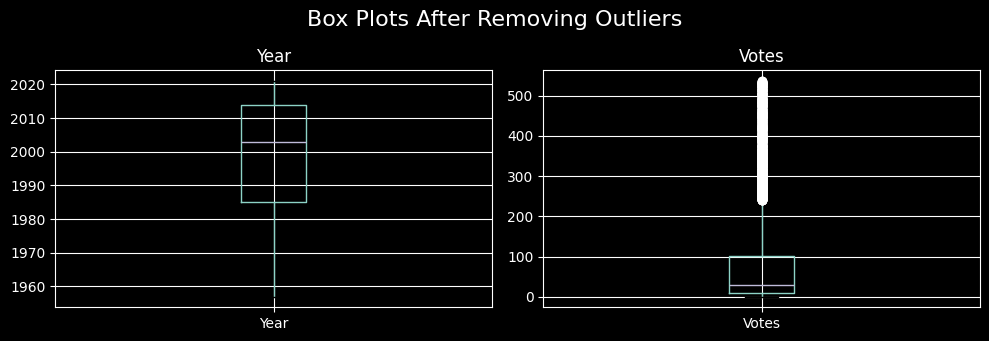

In [121]:
# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()



In [122]:
# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))

Number of rows after removing outliers: 5033


Exploratory Data Analysis

Rating Analysis

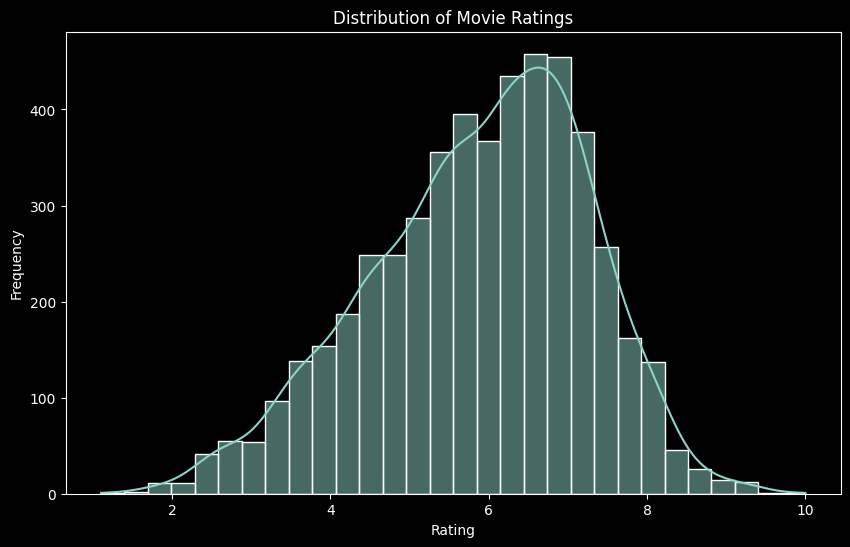

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Votes Analysis

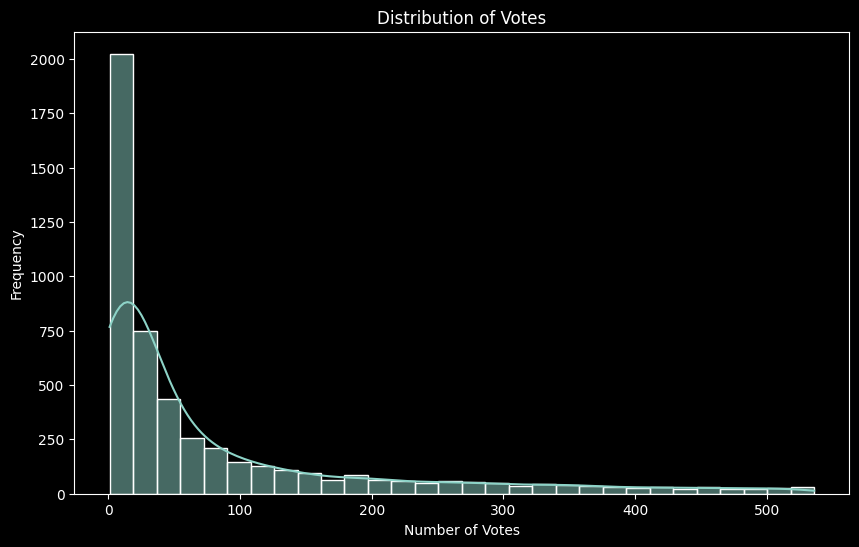

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

Top 10 Directors with the Most Movies Directed

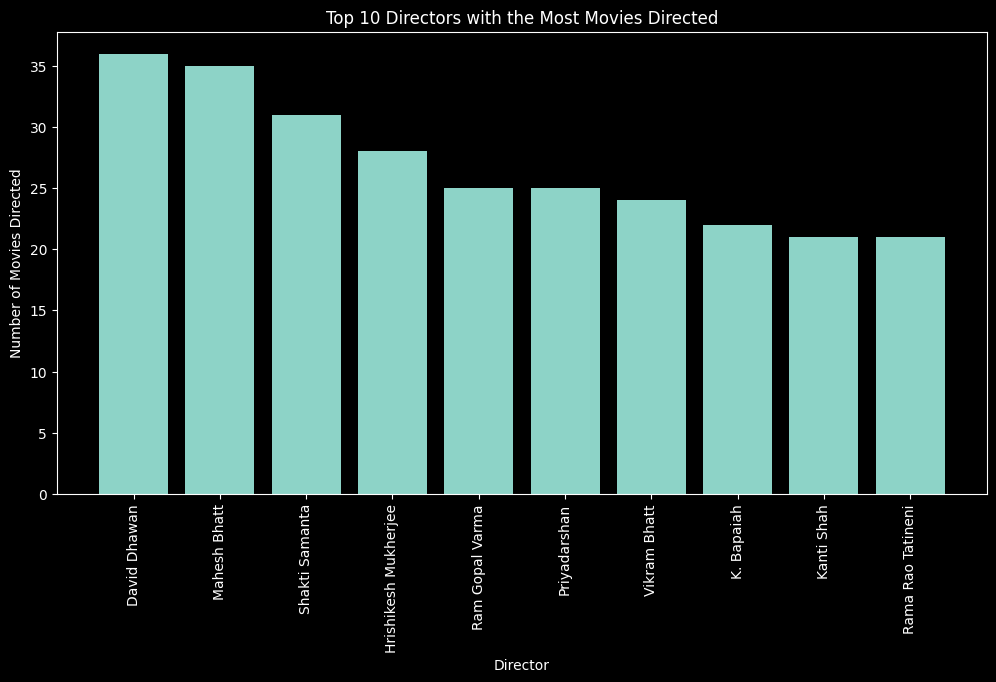

In [125]:

# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()
# Select the top 10 directors with the most movies directed
top_10_directors = director_counts.head(10)
# Create a bar plot to visualize the top 10 directors with the most movies directed
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values),
plt.title('Top 10 Directors with the Most Movies Directed')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=90)
plt.show()

Top 10 Actors with the Most Movie Appearances

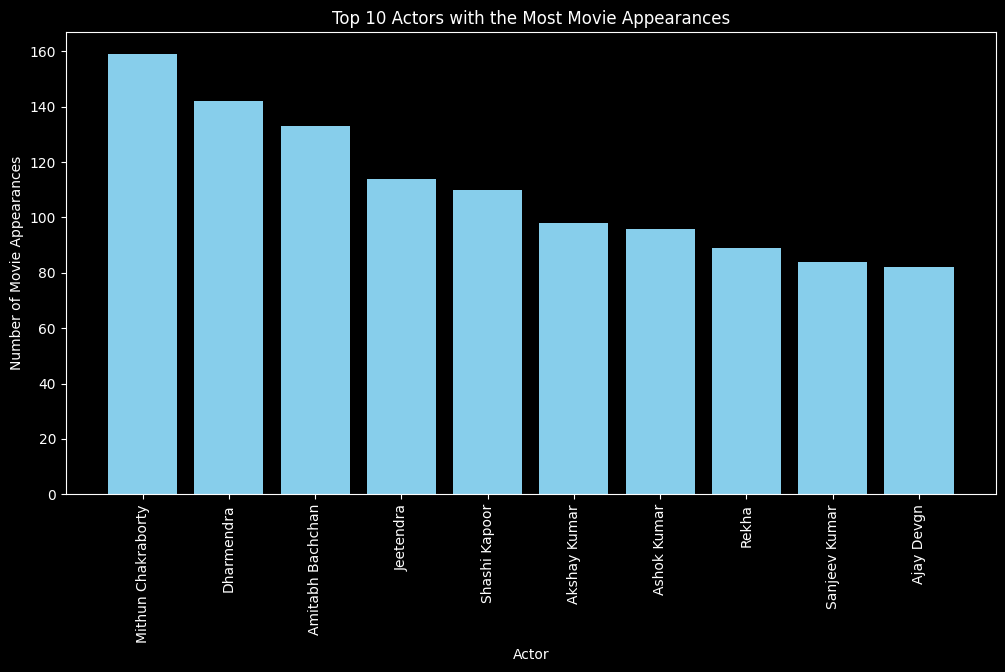

In [126]:

# Count the number of movies in which each actor starred
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
# Select the top 10 actors with the most movie appearances
top_10_actors = actor_counts.head(10)
# Create a bar plot to visualize the top 10 actors with the most movie appearances
plt.figure(figsize=(12, 6))
plt.bar(top_10_actors.index, top_10_actors.values,  color='skyblue')
plt.title('Top 10 Actors with the Most Movie Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Movie Appearances')
plt.xticks(rotation=90)
plt.show()


Top 10 Directors with the Highest-Rated Movies

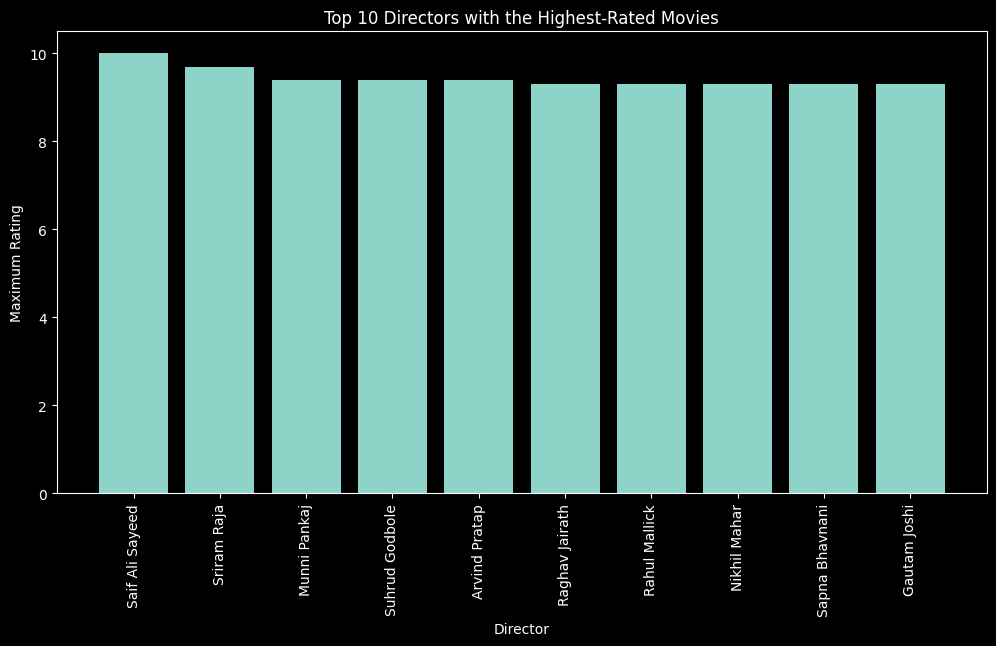

In [127]:

# Group the data by director and find the maximum rating within each group
directors_max_rating = df.groupby('Director')['Rating'].max()
# Sort the directors by their highest rating in descending order and select the top 10
top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)
# Create a bar plot to visualize the top 10 directors with the highest-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()

Top 10 Highly Rated Movie Genres

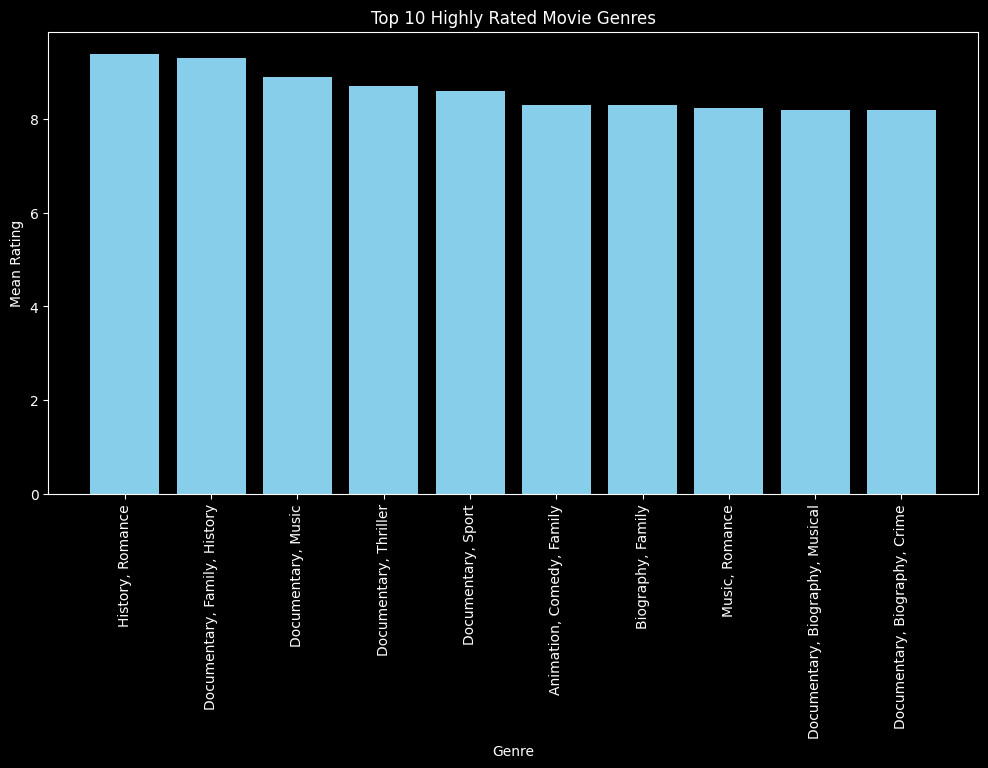

In [128]:

# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()
# Sort the genres by mean rating in descending order and select the top 10
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)
# Create a bar plot to visualize the top 10 highly rated genres
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

Top 10 Years with Highest Average Ratings

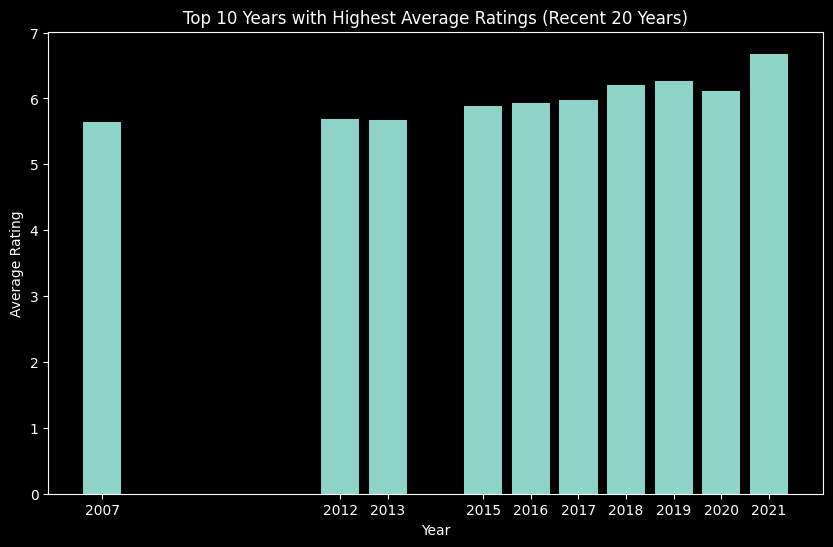

In [129]:
# Filter the DataFrame for the most recent 20 years
recent_years = df[df['Year'] >= (max(df['Year']) - 19)]
# Calculate the average rating per year
average_ratings = recent_years.groupby('Year')['Rating'].mean().reset_index()
# Sort the DataFrame by average rating in descending order and select the top 10 years
top_10_years = average_ratings.nlargest(10, 'Rating')
# Plot the top 10 years and their average ratings
plt.figure(figsize=(10, 6))
plt.bar(top_10_years['Year'], top_10_years['Rating'])
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Top 10 Years with Highest Average Ratings (Recent 20 Years)')
plt.xticks(top_10_years['Year'])
plt.show()

Duration vs Rating

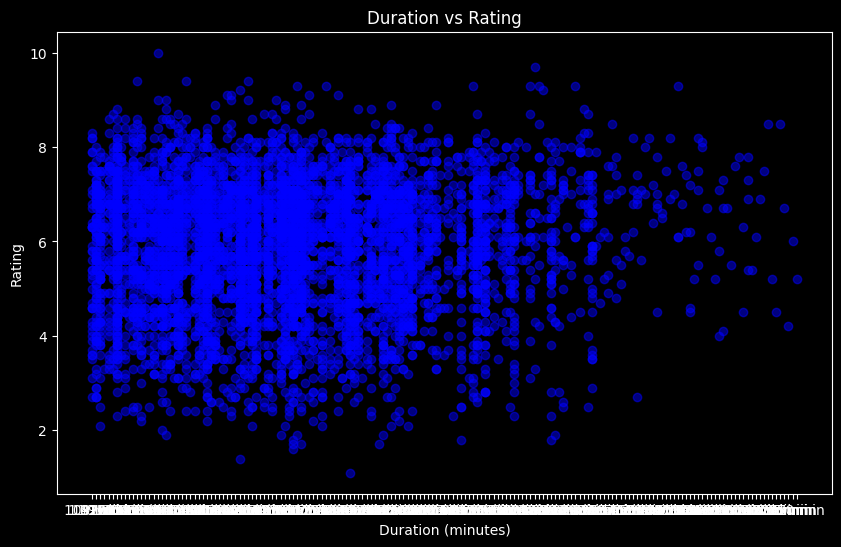

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.5, color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Duration vs Rating')
plt.show()

Correlation Matrix

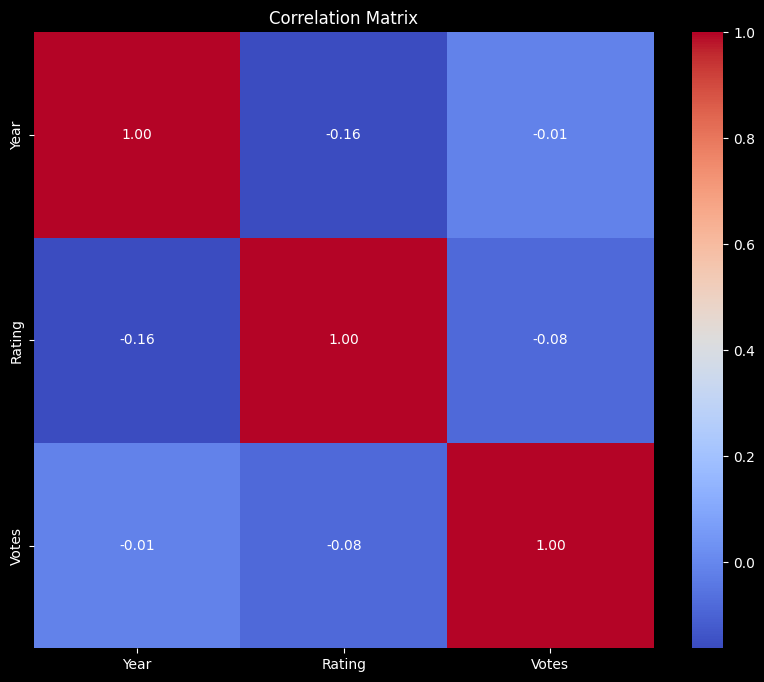

In [141]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Pairplot

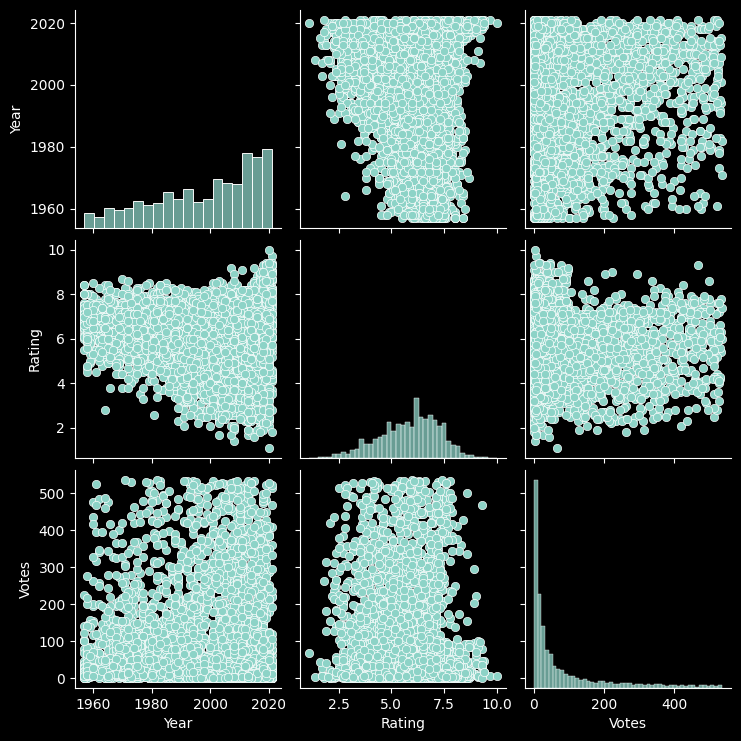

In [142]:

# Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])
# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()

Data Preprocessing

In [143]:
X = df.drop('Rating', axis=1)
y = df['Rating']
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116 min,"Action, Crime, Thriller",11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


Check for mutlicollinearity X

In [145]:
X.select_dtypes(include=[np.number]).corr()

,Year,Votes
Year,1.000000,-0.013691
Votes,-0.013691,1.000000


One-hot encode the categorical variables
One-hot encoding is used to convert categorical variables into a binary format, which is suitable for machine learning algorithms

In [150]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [159]:
# Specify the categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Director','Actor 1', 'Actor 2', 'Actor 3']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])

# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_...Yahaan,Name_02-Oct,Name_100% Love,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zara Shah,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scaling Numerical Features

In [163]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])

In [164]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_...Yahaan,Name_02-Oct,Name_100% Love,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zara Shah,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.00,0.500000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,1.000000,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.000000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.75,0.333333,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.00,0.666667,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.505618
4,0.325843
...,...
5028,0.505618
5029,0.561798
5030,0.573034
5031,0.528090


Train-Test Split

In [172]:

# Split the data into training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

Modeling

regression modeling

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create an imputer to fill in missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model on the imputed training data
lr_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_pred_test = lr_model.predict(X_test_imputed)
y_pred_train = lr_model.predict(X_train_imputed)

Baseline Model Evaluation

In [175]:

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Test Mean Squared Error : {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")

print(f"Train Mean Squared Error : {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Test Mean Squared Error : 0.020340588005504968
Test R-squared (R^2) Score: 0.19346459309516584
Train Mean Squared Error : 8.106285821823477e-30
Train R-squared (R^2) Score: 1.0


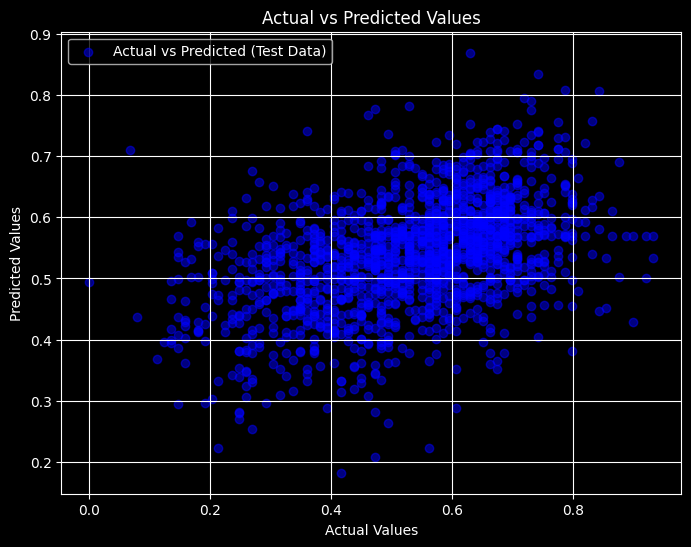

In [176]:
# Create a scatter plot for the test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Actual vs Predicted (Test Data)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Second Model: Random Forest Model

In [ ]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [182]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Random Forest Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Random Forest Regressor Model Evaluation:
Test Mean Squared Error: 0.020340588005504968
Test R-squared (R^2) Score: 0.19346459309516584
Train Mean Squared Error: 8.106285821823477e-30
Train R-squared (R^2) Score: 1.0


Gradient Boosting Regressor

In [184]:

from sklearn.impute import SimpleImputer

# Create an imputer to fill in missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the imputed training data
gb_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_pred_test = gb_model.predict(X_test_imputed)
y_pred_train = gb_model.predict(X_train_imputed)

c:\Users\EMC\PYTHON B\venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [185]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Gradient Boosting Regressor Model Evaluation:
Test Mean Squared Error: 0.022700346319560017
Test R-squared (R^2) Score: 0.09989656883213249
Train Mean Squared Error: 0.018944052265712157
Train R-squared (R^2) Score: 0.19472636956872091


Conclusion
In conclusion, this project provides valuable insights and a predictive model for movie rating prediction. The film industry can benefit from these findings to make data-driven decisions regarding movie production, casting, and marketing. The most influential factors identified are the year of release, the number of votes, and movie duration.